In [1]:
import oritelib as orite
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
og_seq = orite.seq_from_fasta("test_data/exciting_bacteria/Hydrogenobaculum_L1_FASTA.fasta")
nc_intervals = orite.genbank_to_non_coding_intervals("test_data/exciting_bacteria/Hydrogenobaculum _L1_GB.gb")
og_gc, og_cgc = orite.gc_skew_sliding_window(og_seq, 1000)

In [3]:
max_things = orite.max_rotate_seq_and_skew_calc(og_seq, window_radius=50000)

inital max gc skew indx 218763
max cgc skew indx 1559513


In [4]:
max_cg = max_things[0]
max_cgc = max_things[1]
max_fasta = max_things[2]
max_offset = max_things[3]

In [5]:
nc_intervals_list =nc_intervals[0]

In [6]:
def get_phased_nc_region_list(nc_intervals, og_fasta, max_offset, max_cgc):
    nc_objects = orite.nc_intervals_to_nc_objects(nc_intervals, og_fasta)
    phased_nc_objects = orite.add_max_relative_position(nc_objects, len(og_fasta), max_offset)
    max_scored_nc_objects = orite.calc_score_over_region_list(phased_nc_objects, max_cgc, rotated = True)
    return max_scored_nc_objects
    

In [7]:
x0 = get_phased_nc_region_list(nc_intervals_list, og_seq, max_offset, max_cgc)

In [8]:
#nc_region_list = orite.nc_intervals_to_nc_objects(nc_intervals_list)

In [9]:
len(x0)

851

In [10]:
x1 = orite.get_kmers_from_region_list(x0, [ 6, 7, 8, 9, 10])
len(x1)

851

In [11]:
x2 = orite.filter_region_list_by_kmer_occurence(x1, 3)

In [12]:
x3 = orite.filter_empty_kmer_regions(x2)

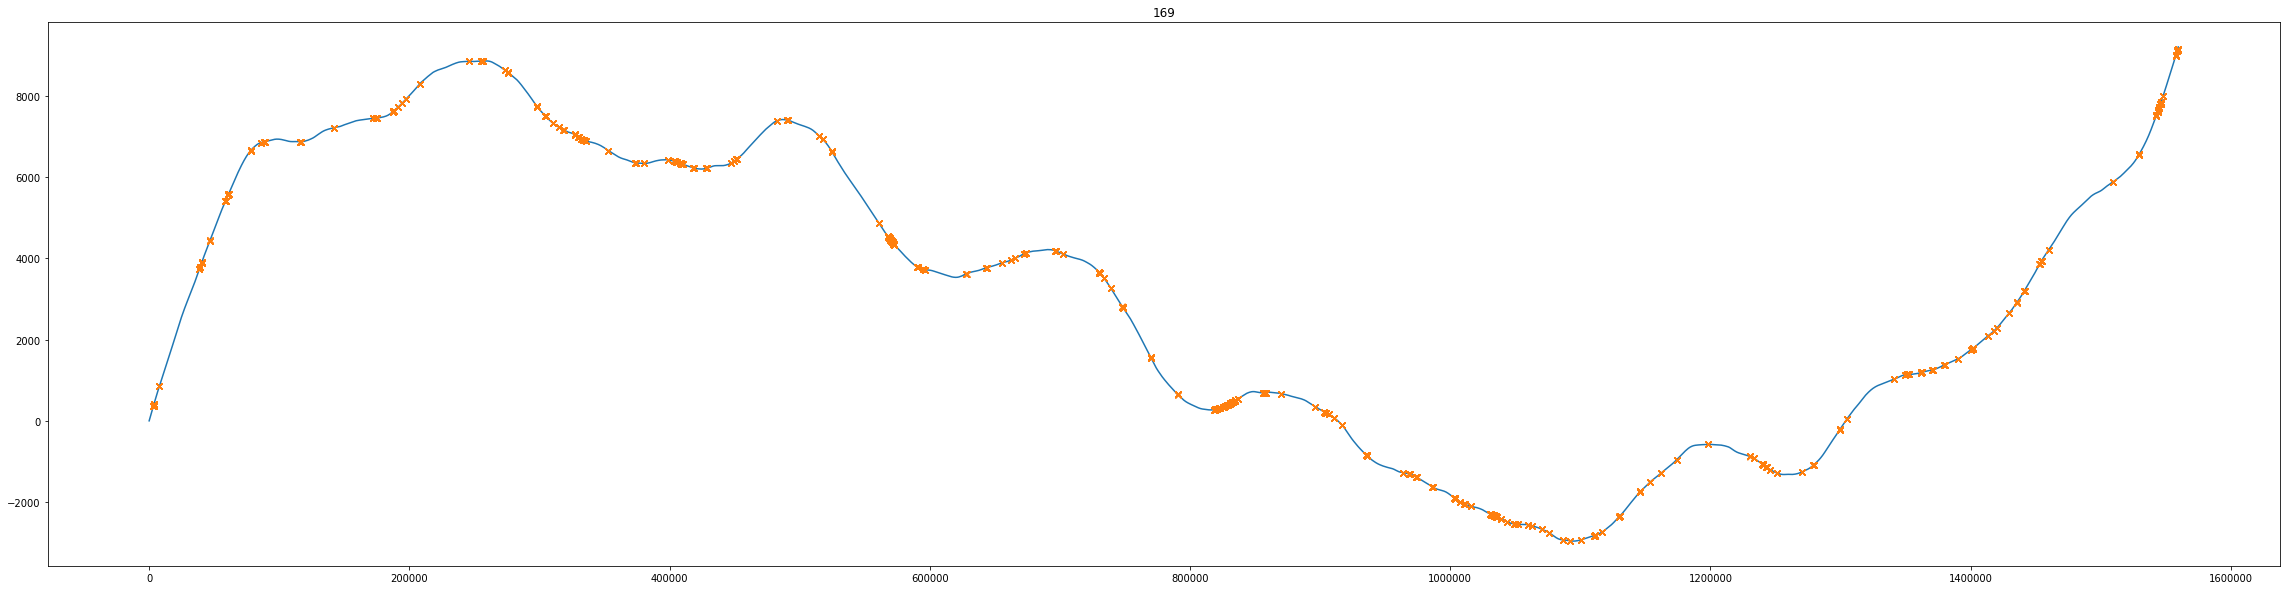

In [13]:
orite.plot_region_list(x3, max_cgc, rotated=True)

In [14]:
x4 = orite.filter_regions_by_length(x3, 50)
len(x4)

161

In [15]:
def calc_density_for_region_list(region_list):
    new_list = []
    
    for region in region_list:
        region.calc_kmer_density()
        new_list.append(region)
    return new_list
    

In [16]:
x5 = calc_density_for_region_list(x4)

In [17]:
def filter_out_empty_kmer_key_in_region_list(region_list):
    
    new_list = []
    
    for region in region_list:
        region.filter_out_empty_kmer_lists_in_kmer_dict()
        new_list.append(region)
    return new_list
    

In [18]:
def sort_region_list_on_density(region_list):
    
    new_list = []
    
    for region in region_list:
        region.sort_kmer_info_by_density()
        new_list.append(region)
    return new_list


In [19]:
x6 = filter_out_empty_kmer_key_in_region_list(x5)

In [20]:
x7 = sort_region_list_on_density(x6)

In [21]:
i = 0
k = 6
bla_list = []
for region in x7: 

    if region.kmer_info.get(k) != None:
        
        for line in region.kmer_info.get(k):
            bla_list.append(line)
       

In [22]:
bla_list.sort(key = lambda x:x[2], reverse = True)

In [23]:
x7[3].kmer_info

{6: [('TTTTTG', [3, 57, 63, 90], 0.09090909090909091),
  ('ATTTTT', [3, 20, 55, 89], 0.043478260869565216),
  ('TGTTTG', [4, 67, 182, 193, 201], 0.029850746268656716),
  ('TTTGTT', [4, 59, 65, 203, 208], 0.026845637583892617),
  ('TTGTTT', [3, 60, 66, 204], 0.020833333333333332),
  ('TTTTGT', [3, 58, 64, 207], 0.020134228187919462)],
 7: [('TTTGTTT', [3, 59, 65, 203], 0.020833333333333332),
  ('TTTTGTT', [3, 58, 64, 207], 0.020134228187919462)]}

In [24]:
x7[3].remove_kmer_overlap()

In [25]:
x7[3].kmer_info

{6: [('TTTTTG', [3, 57, 63, 90], 0.09090909090909091),
  ('ATTTTT', [3, 20, 55, 89], 0.043478260869565216),
  ('TGTTTG', [4, 67, 182, 193, 201], 0.029850746268656716),
  ('TTGTTT', [3, 60, 66, 204], 0.020833333333333332),
  ('TTTTGT', [3, 58, 64, 207], 0.020134228187919462)],
 7: []}

In [26]:
def remove_overlapping_kmers_from_region_list(region_list):
    
    new_list = []
    
    for region in region_list:
        region.remove_kmer_overlap()
        new_list.append(region)
    return new_list

In [27]:
x8 = remove_overlapping_kmers_from_region_list(x7)

In [28]:
x9 = sort_region_list_on_density(x8)

In [29]:
x9[3].kmer_info

{6: [('TTTTTG', [3, 57, 63, 90], 0.09090909090909091),
  ('ATTTTT', [3, 20, 55, 89], 0.043478260869565216),
  ('TGTTTG', [4, 67, 182, 193, 201], 0.029850746268656716),
  ('TTGTTT', [3, 60, 66, 204], 0.020833333333333332),
  ('TTTTGT', [3, 58, 64, 207], 0.020134228187919462)],
 7: []}

In [30]:
i = 0
k = 6
bla_list = []
for region in x8: 

    if region.kmer_info.get(k) != None:
        
        for line in region.kmer_info.get(k):
            new_tuple = (line, region)
            bla_list.append(new_tuple)

In [31]:
bla_list.sort(key = lambda x:x[0][2], reverse = True)

In [32]:
bla_list

[(('AAAATA', [3, 34, 40, 46], 0.25), <oritelib.NC_region at 0x7f8efd9862b0>),
 (('GCAAAC', [3, 199, 206, 213], 0.21428571428571427),
  <oritelib.NC_region at 0x7f8efe90d358>),
 (('GTAGAC', [3, 265, 273, 283], 0.16666666666666666),
  <oritelib.NC_region at 0x7f8efe8ebfd0>),
 (('TATTTT', [3, 29, 41, 48], 0.15789473684210525),
  <oritelib.NC_region at 0x7f8efe916400>),
 (('TTAACA', [3, 78, 90, 98], 0.15), <oritelib.NC_region at 0x7f8efead1128>),
 (('GTTAAC', [3, 77, 89, 97], 0.15), <oritelib.NC_region at 0x7f8efead1128>),
 (('TGTTAA', [3, 76, 88, 96], 0.15), <oritelib.NC_region at 0x7f8efead1128>),
 (('TATAAA', [3, 27, 33, 47], 0.15), <oritelib.NC_region at 0x7f8efe8eb1d0>),
 (('CAACAT', [3, 8, 19, 30], 0.13636363636363635),
  <oritelib.NC_region at 0x7f8f4c51feb8>),
 (('GCAACA', [3, 7, 18, 29], 0.13636363636363635),
  <oritelib.NC_region at 0x7f8f4c51feb8>),
 (('TGCAAC', [3, 6, 17, 28], 0.13636363636363635),
  <oritelib.NC_region at 0x7f8f4c51feb8>),
 (('TTTATA', [3, 25, 35, 47], 0.13636

In [33]:
y1 = bla_list[0:1000]

In [34]:
dope_regions = []
for x in y1:
    dope_object= x[1]
    dope_regions.append(dope_object)

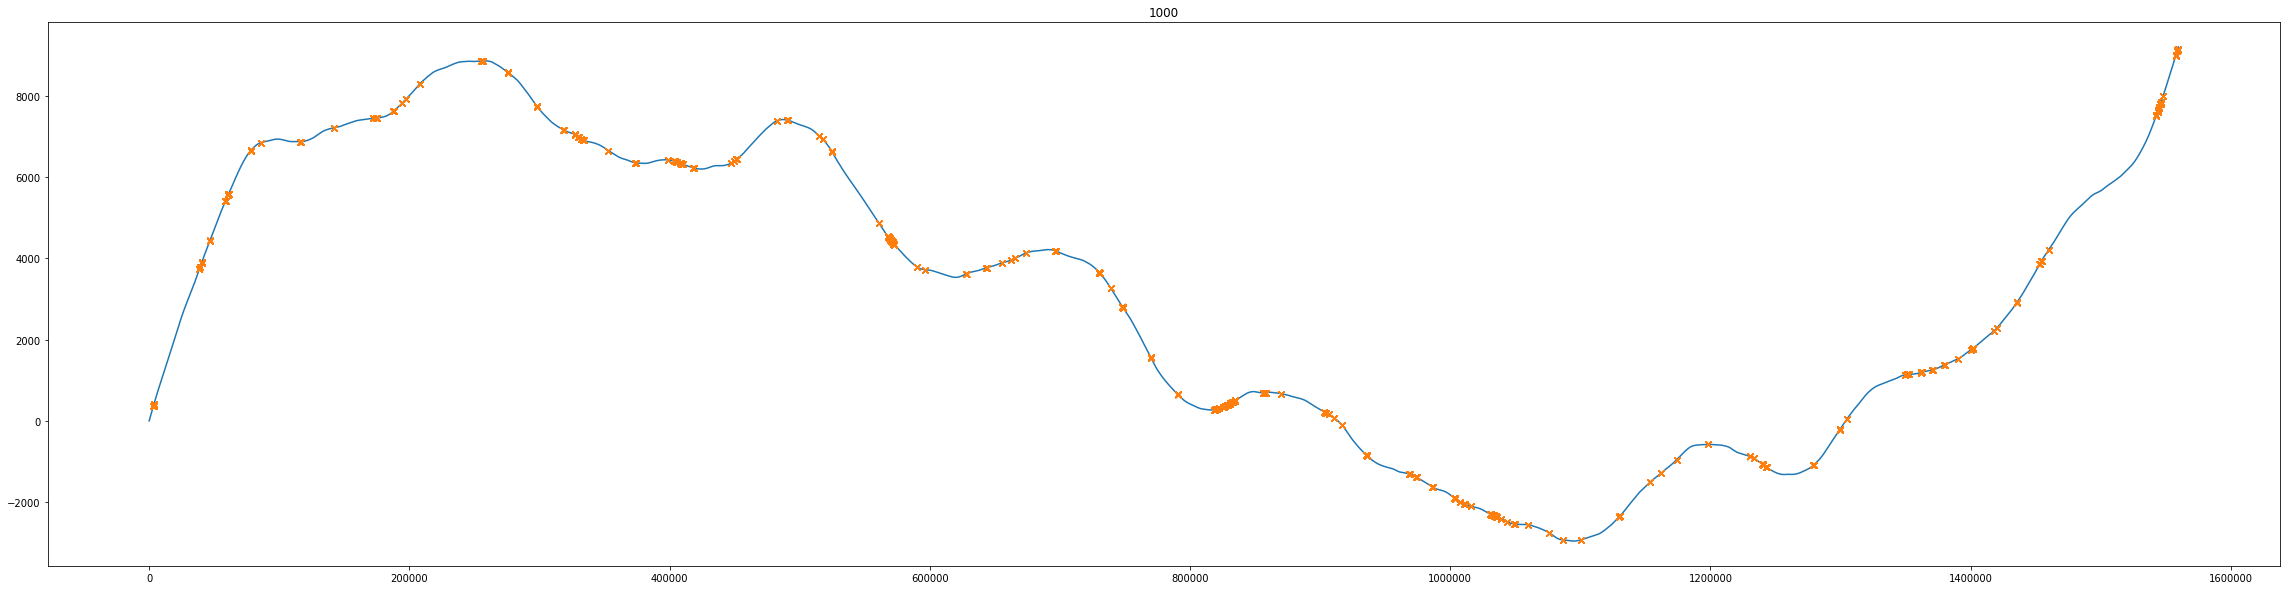

In [35]:
orite.plot_region_list(dope_regions, max_cgc,rotated=True)

In [36]:
orite.sort_regions_by_score(dope_regions)


dopest_regions = dope_regions[:100]




In [37]:
for region in dopest_regions:
    print(region.start)

1319025
1319025
1319025
1319025
1305329
1305329
1294712
1278156
1278156
1268006
1268006
1268006
1268006
1268006
1268006
1268006
1268006
1268006
1268006
1268006
1268006
1268006
1268006
1268006
1262276
1262276
1262276
1262276
1257941
1348697
1348697
1348697
1348697
1348697
1348697
1348697
1348697
1348697
1348697
1348697
1348697
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234
1249234


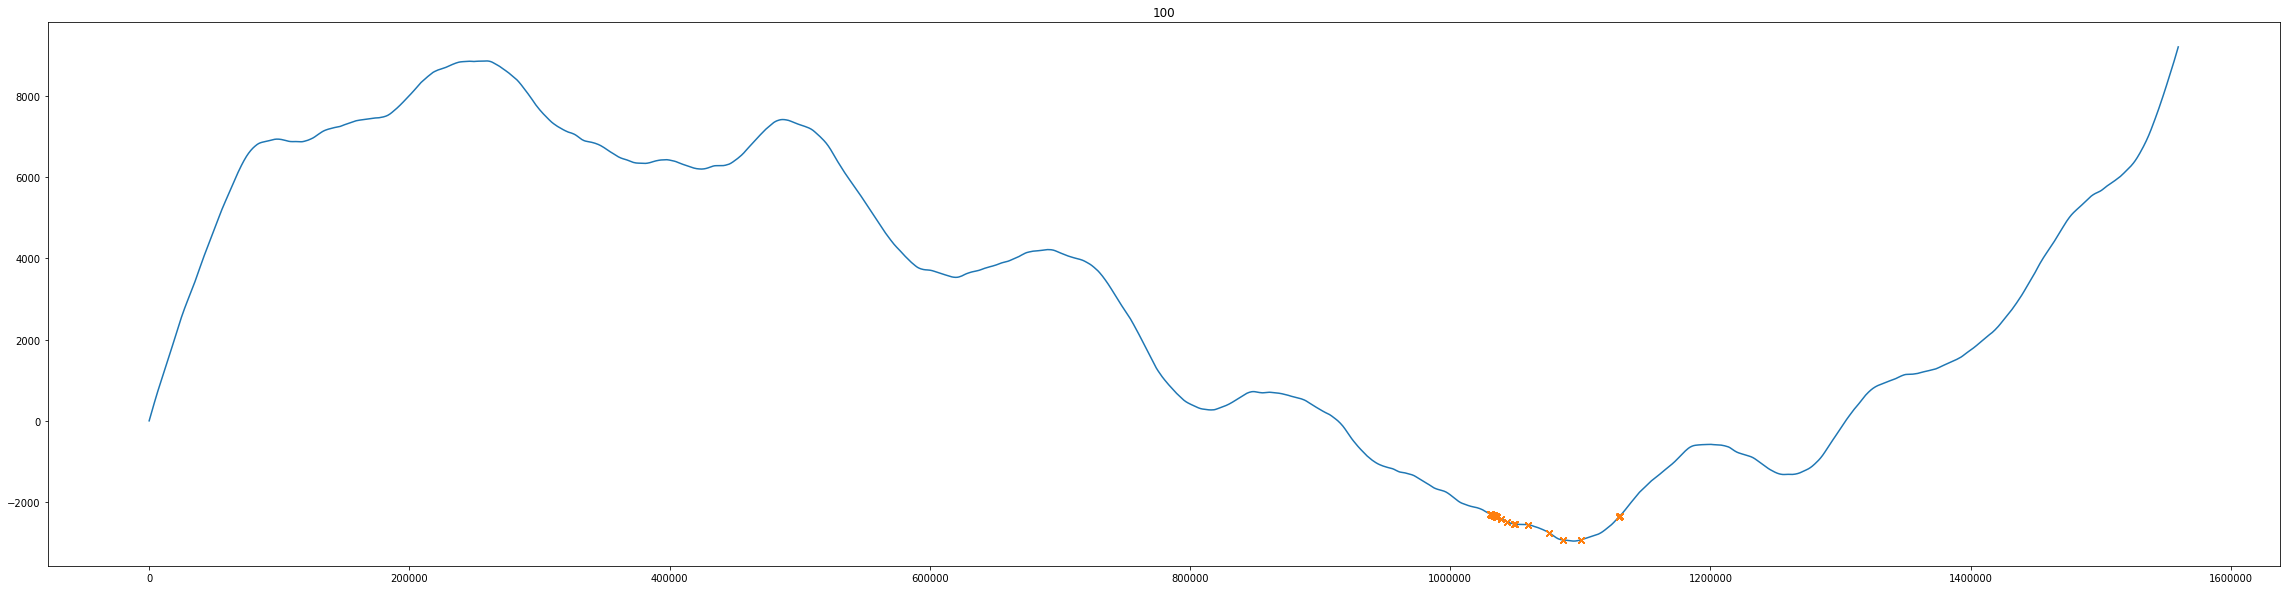

In [38]:
orite.plot_region_list(dopest_regions, max_cgc,rotated=True)

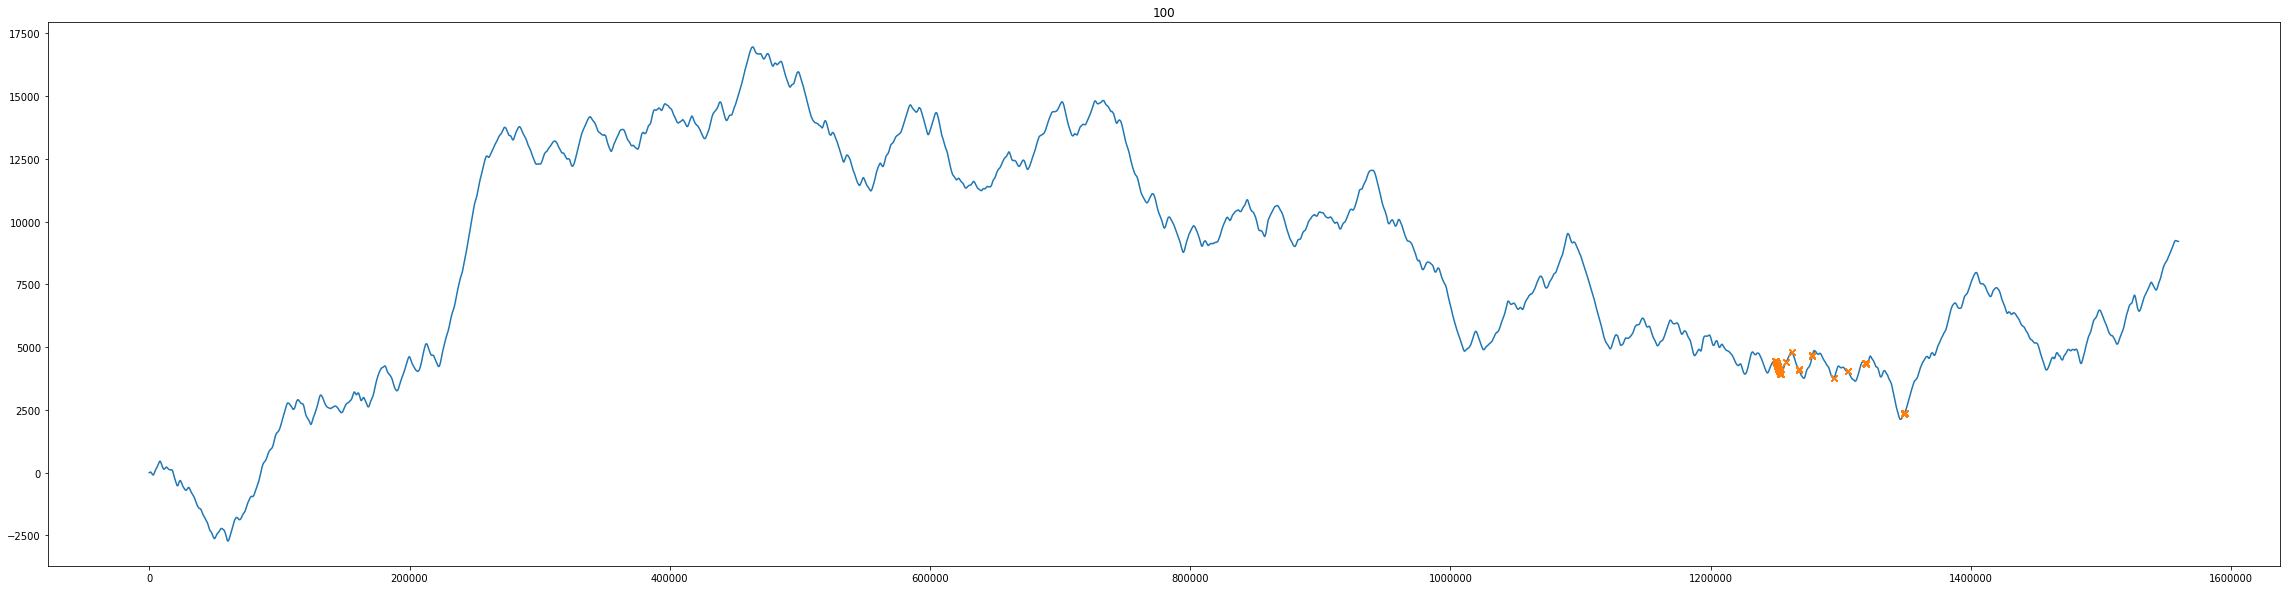

In [39]:
orite.plot_region_list(dopest_regions, og_cgc,rotated=False)

In [40]:
len(max_cgc)

1559514